In [ ]:
import pandas as pd
import random
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import DBSCAN
import math
import statistics
pd.options.mode.chained_assignment = None  # default='warn'

#Convert CSV to Dataframe
data = pd.read_csv("./data/iou-dsc.csv", header=[0]).replace('\n','', regex=True)
data

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,MANUAL ID,TIME_SPENT,LAST MOD BY,LAST MOD DATE,LAST MOD TIME
0,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,0.6511,2.1214,24000,0,44100,bird,11.652,admin,NaN,NaN
1,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,12.6092,3.1042,24000,0,44100,bird,11.654,admin,NaN,NaN
2,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,14.1490,1.3842,24000,0,44100,bird,33.147,nelly,NaN,NaN
3,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,1.1590,1.3760,24000,0,44100,bird,33.150,nelly,NaN,NaN
4,XC425555_-_Screaming_Piha_-_Lipaugus_vociferan...,15.73850,1.1622,0.6098,24000,0,44100,bird,166.323,edmundo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
72,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,4.3832,0.0527,24000,0,44100,bird,95.519,edmundo,NaN,NaN
73,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,3.2886,0.5116,24000,0,44100,bird,95.504,edmundo,NaN,NaN
74,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,3.7851,0.5643,24000,0,44100,bird,95.522,edmundo,NaN,NaN
75,XC591821_-_Screaming_Piha_-_Lipaugus_vociferan...,5.66646,2.7602,1.7457,24000,0,44100,bird,57.017,ryan,NaN,NaN


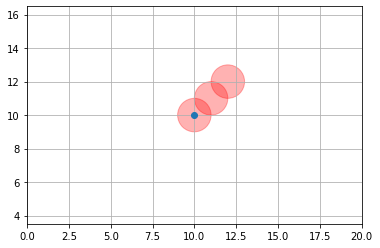

In [ ]:
plt.figure()
plt.axis("equal")
for i in range(3):
  c=plt.Circle((10+i, 10+i), radius=1, color='red', alpha=.3)
  plt.gca().add_artist(c)
plt.axis([0, 20, 0, 20])
plt.plot(10, 10, 'o',  alpha = 1, );
#add circle to plot (gca means "get current axis")

plt.grid()
plt.show()



In [ ]:
from sklearn.cluster import KMeans

from numpy import sin, cos, pi, linspace
def distance_cal2(s1,e1,s2,e2):
  return math.sqrt((s2 - s1) * (s2 - s1) + (e2 - e1) * (e2 - e1) )

def distance_cal3(s1,e1,s2,e2, d1, d2):
  return math.sqrt((s2 - s1) * (s2 - s1) + (e2 - e1) * (e2 - e1) + (d2 - d1) * (d2 - d1)) 


def labels_users_plot(file_):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
  colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(users))))
  #plt.axis("equal")
  for user in users:
    color = next(colors)
    user_annotations = data_oi[data_oi["LAST MOD BY"] == user]
    
    x = user_annotations["OFFSET"]
    y = x + user_annotations["DURATION"]


    f = plt.figure(1)
    plt.xlabel("Start Time")
    plt.ylabel("Duration")
    plt.plot(x, y, 'o', color=color,  alpha = 1);
    
    f.show()

    




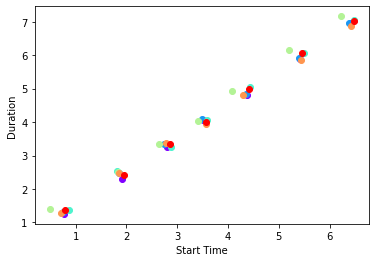

In [ ]:
labels_users_plot("XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

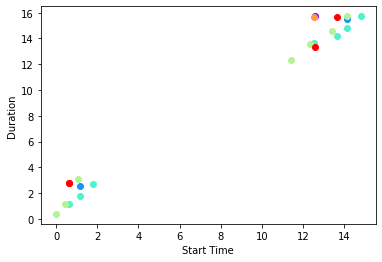

In [ ]:
labels_users_plot("XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")

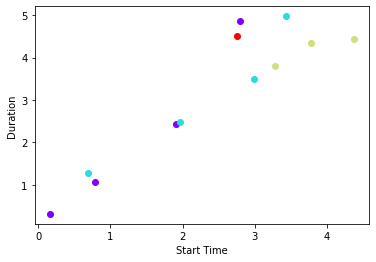

In [ ]:
labels_users_plot("XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3")





Test for DBSCAN refinement







*italicized text*

In [ ]:
def draw_circle(data, color ='red', alpha=0.3, radius=1):
    for index, row in data.iterrows():
        start = float(row["OFFSET"])
        end = start + float(row["DURATION"])
        c=plt.Circle((start, end), radius=radius, color=color, alpha=alpha)
        plt.gca().add_artist(c)

In [ ]:
import random
def label_clusters(model_builder, file_, distance=1/2, agreement=1, duration=True,  iterate_users=False):
  data_oi = data[data["IN FILE"] == file_]
  users = data_oi["LAST MOD BY"].unique()
  if (iterate_users) :
      users = list(data_oi["LAST MOD BY"].unique())
      user_test = []
      for i in range(1, len(users)+1):
        print(random.sample(users, 1)[0])
        user_test.append(random.sample(users, 1)[0])
        print(user_test)
        data_test = data_oi[data_oi['LAST MOD BY'].isin(user_test)]
        print(user_test)
        run_clustering(model_builder, data_test, user_test, distance, agreement, duration,  figure = i)
        
  else:
    run_clustering(model_builder, data_oi, users, distance, agreement, duration,  figure = 1)
  

def run_clustering(model_builder, data_oi, users, distance=1/2, agreement=1, duration=True,  figure=1):
 
  data_oi["END TIMES"] = data_oi["DURATION"].add(data_oi["OFFSET"], fill_value=0)
  #print(tabulate(data_oi, headers='keys', tablefmt='psql'))

  neighborhood_size, model = model_builder(data = data_oi, distance = distance, users = users, agreement = agreement)
  model = model.fit(data_oi[["OFFSET", "END TIMES"]])
  clusters = model.fit_predict(data_oi[["OFFSET", "END TIMES"]])
  if (duration): clusters = model.fit_predict(data_oi[["OFFSET", "END TIMES", "DURATION"]])
  data_oi["cluster"] = clusters
  print(clusters)

  adv_cluster_count = 0
  adv_num_unique_users = 0 
  for i in range(max(clusters)):
     temp = data_oi[data_oi["cluster"] == i]
     adv_cluster_count += len(temp)
     adv_num_unique_users += len(pd.unique(temp['LAST MOD BY']))
  adv_cluster_count /= max(clusters)
  adv_num_unique_users /=  max(clusters)
  print("adverage cluster size: ", adv_cluster_count)
  print("adverage unqiue users per cluster size: ", adv_num_unique_users)


  colors = (plt.cm.rainbow(np.linspace(0, 1, max(clusters)+2)))
  i = 0
  for cluster in clusters:
    user_annotations = data_oi[data_oi["cluster"] == cluster]
    i += 1
    x = user_annotations["OFFSET"]
    y = user_annotations["END TIMES"]
    

    ##f = plt.figure(1)
    ##plt.xlabel("Start Time")
    ##plt.ylabel("Duration")
    ##plt.plot(x, y, 'o', color=colors[cluster+1]);
    #f.show()
    
    g = plt.figure(figure)
    plt.xlabel("Start Time")
    plt.ylabel("End Time")
    draw_circle(user_annotations, color=colors[cluster+1], alpha=1/len(x)*0.1, radius=neighborhood_size)
    plt.plot(x, y, 'o', color=colors[cluster+1], alpha = 1);
    
    g.show()

 


def DBSCAN_auto_dis_builder_min_dis2(data = None, distance = 1, users = None, agreement = 0.5, duration=False):
    NEIGHBORHOOD_SCALAR = distance

    n = 0
    adv_distance = []
    dists_raw = []
    for i in range(len(users)):
      dists = []
      user_labels = data[data['LAST MOD BY'] == users[i]]
      s1 = 0
      e1 = 0
      s2 = 0
      e2 = 0
      d1 = 0
      d2 = 0
      skip = True
      for index, row in user_labels.iterrows():
        #print(s1,e1,s2,e2)
        s2 = float(row["OFFSET"])
        e2 = float(row["END TIMES"])
        d2 = float(row["DURATION"])
        dist = distance_cal3(s1,e1,s2,e2, d1, d2)
        if (not skip):
          dists_raw.append(dist)
        
        skip = False
        s1 = s2
        e1 = e2
        d1 = d2

    adv_distance = min(dists_raw) #* NEIGHBORHOOD_SCALAR #
    print(adv_distance)
    return adv_distance, DBSCAN(
                    eps=adv_distance *0.9, 
                    min_samples=2,
                  
                  )

0.8240679947674229
[ 0  1  2 -1 -1  3 -1 -1 -1  4 -1  4 -1  0 -1  3 -1  2  1  0  0  3  2]
adverage cluster size:  3.0
adverage unqiue users per cluster size:  3.0


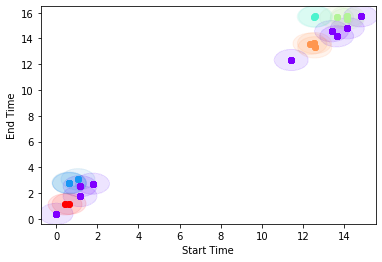

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

0.981324115672289
[0 1 2 3 4 5 6 3 1 0 2 5 4 6 1 0 2 3 5 6 4 1 3 0 2 4 5 6 3 5 4 2 1 0 6 1 0
 5 3 2 4 6]
adverage cluster size:  6.0
adverage unqiue users per cluster size:  6.0


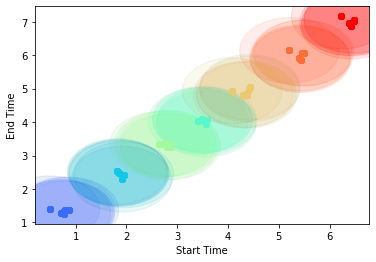

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

0.7422332382748698
[ 0  1  2  1 -1  3  0 -1  3 -1  2 -1]
adverage cluster size:  2.0
adverage unqiue users per cluster size:  2.0


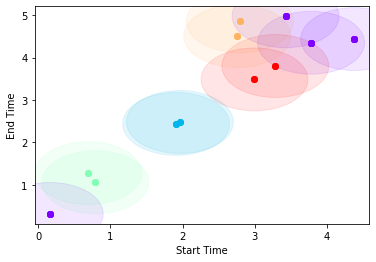

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

1.0946409091569707
[0 1 2 2 2 3 4 2 1 0 2 3 2 4 1 0 2 2 3 4 2 1 2 0 2 2 3 4 2 3 2 2 1 0 4 1 0
 3 2 2 2 4]
adverage cluster size:  9.0
adverage unqiue users per cluster size:  6.0


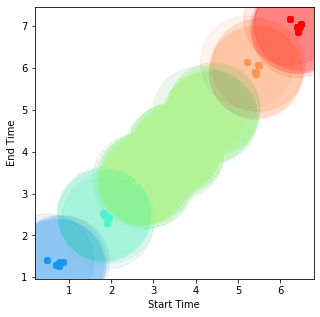

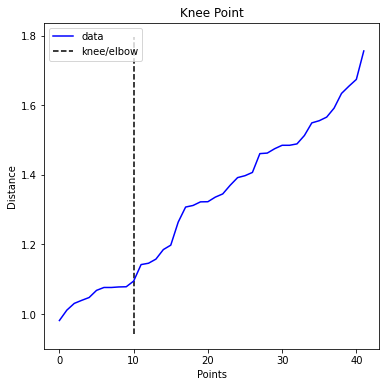

In [ ]:
!pip install kneed
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

def DBSCAN_knee_locator_builder(data = None, distance = 1, users = None, agreement = 0.5, duration=False,):
  df = data[["OFFSET", "END TIMES", "DURATION"]]
  nearest_neighbors = NearestNeighbors(n_neighbors=11)
  neighbors = nearest_neighbors.fit(df)

  distances, indices = neighbors.kneighbors(df)
  distances = np.sort(distances[:,10], axis=0)

  

  i = np.arange(len(distances))
  knee = KneeLocator(i, distances, S=100, curve='convex', direction='increasing', interp_method='polynomial')

  fig = plt.figure(figsize=(5, 5))
  knee.plot_knee()
  plt.xlabel("Points")
  plt.ylabel("Distance")

  print(distances[knee.knee])
  return distances[knee.knee], DBSCAN(
                    eps=distances[knee.knee], 
                    min_samples=2,
                  
                  )

label_clusters(DBSCAN_knee_locator_builder, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

4.938015315893624
[0 0 0 0 0 0 0 0 0 0 0 0]
adverage cluster size:  nan
adverage unqiue users per cluster size:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars


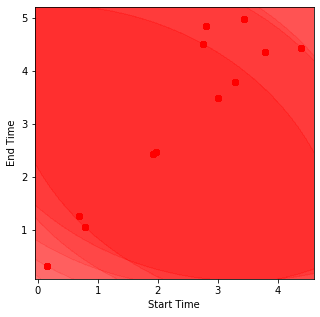

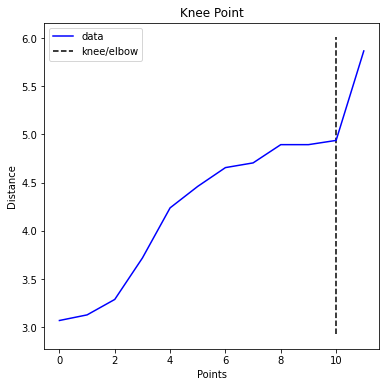

In [ ]:
label_clusters(DBSCAN_knee_locator_builder, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

15.702705435688463
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
adverage cluster size:  nan
adverage unqiue users per cluster size:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in long_scalars


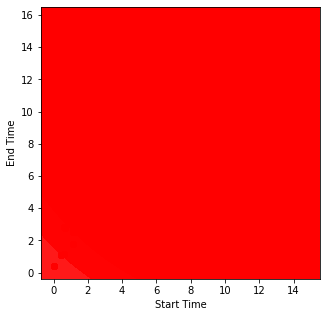

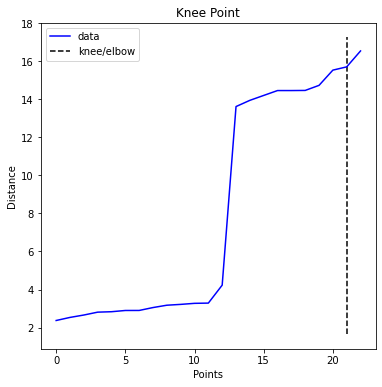

In [ ]:
label_clusters(DBSCAN_knee_locator_builder, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2)

User One at a time Code:

nelly
['edmundo']
['edmundo']
1.1458983200965085
[-1 -1 -1 -1 -1 -1 -1]
adverage cluster size:  -0.0
adverage unqiue users per cluster size:  -0.0
JacobGlennAyers
['edmundo', 'JacobGlennAyers']
['edmundo', 'JacobGlennAyers']
1.0807610189121368
[0 1 2 2 3 4 5 0 2 1 2 5 3 4]
adverage cluster size:  2.4
adverage unqiue users per cluster size:  2.0
edmundo
['edmundo', 'JacobGlennAyers', 'ryan']
['edmundo', 'JacobGlennAyers', 'ryan']
1.0807610189121368
[0 1 2 2 3 4 5 0 2 1 2 5 3 4 2 3 5 2 0 1 4]
adverage cluster size:  3.6
adverage unqiue users per cluster size:  3.0
edmundo
['edmundo', 'JacobGlennAyers', 'ryan', 'ryan']
['edmundo', 'JacobGlennAyers', 'ryan', 'ryan']
1.0807610189121368
[0 1 2 2 3 4 5 0 2 1 2 5 3 4 2 3 5 2 0 1 4]
adverage cluster size:  3.6
adverage unqiue users per cluster size:  3.0
ryan
['edmundo', 'JacobGlennAyers', 'ryan', 'ryan', 'admin']
['edmundo', 'JacobGlennAyers', 'ryan', 'ryan', 'admin']
1.078291648859435
[0 1 2 2 3 4 5 1 0 2 2 4 5 3 1 2 0 2 3 4 5 2 4 3 2 1 0 5]


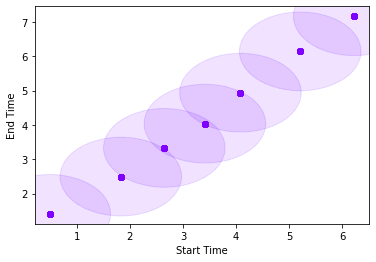

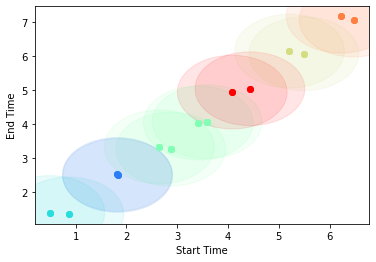

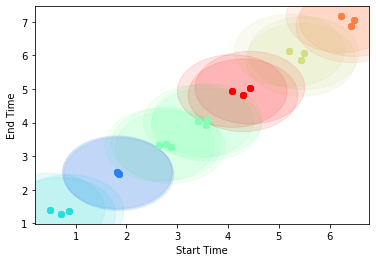

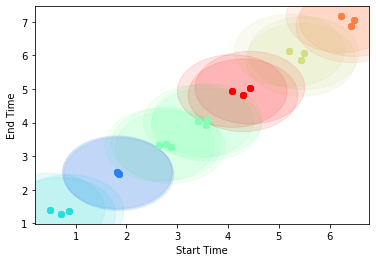

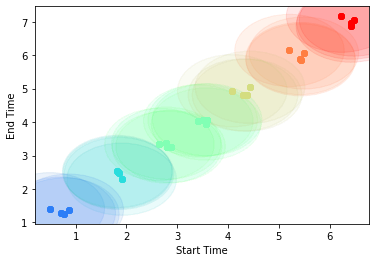

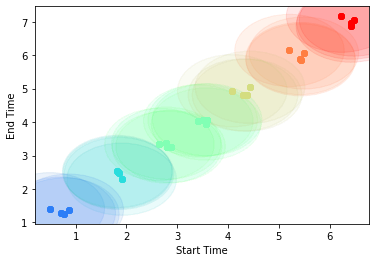

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC552343_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2, iterate_users=True)

edmundo
['ryan']
['ryan']
17.58182190104313
[-1 -1]
adverage cluster size:  -0.0
adverage unqiue users per cluster size:  -0.0
ryan
['ryan', 'sprestrelski']
['ryan', 'sprestrelski']
2.8440655301873745
[ 0  1  1 -1  0]
adverage cluster size:  2.0
adverage unqiue users per cluster size:  2.0
JacobGlennAyers
['ryan', 'sprestrelski', 'ryan']
['ryan', 'sprestrelski', 'ryan']
2.8440655301873745
[ 0  1  1 -1  0]
adverage cluster size:  2.0
adverage unqiue users per cluster size:  2.0
JacobGlennAyers
['ryan', 'sprestrelski', 'ryan', 'admin']
['ryan', 'sprestrelski', 'ryan', 'admin']
2.8440655301873745
[ 0  1  1  0  0 -1  1]
adverage cluster size:  3.0
adverage unqiue users per cluster size:  3.0
JacobGlennAyers
['ryan', 'sprestrelski', 'ryan', 'admin', 'JacobGlennAyers']
['ryan', 'sprestrelski', 'ryan', 'admin', 'JacobGlennAyers']
1.4376244780887661
[ 0  1  2 -1  0 -1  3  2  4  1  0  0  3  4]
adverage cluster size:  2.5
adverage unqiue users per cluster size:  2.25
admin
['ryan', 'sprestrelski

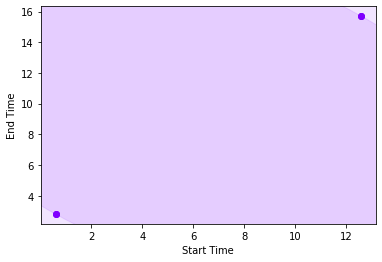

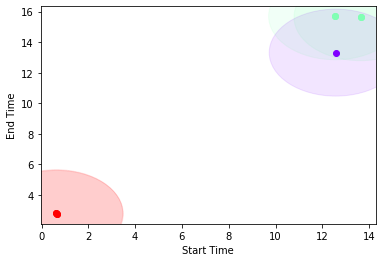

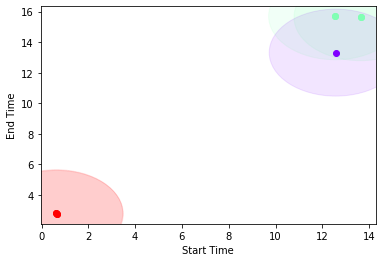

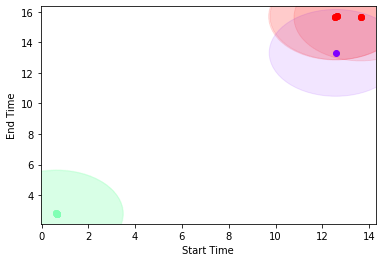

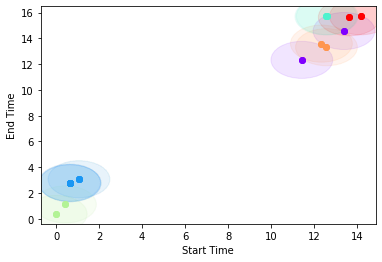

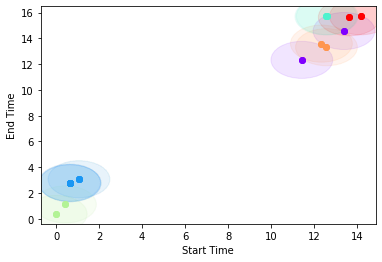

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC425555_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2, iterate_users=True)

edmundo
['admin']
['admin']
1.795918745377975
[-1  0 -1  0]
adverage cluster size:  nan
adverage unqiue users per cluster size:  nan
admin
['admin', 'admin']
['admin', 'admin']
1.795918745377975
[-1  0 -1  0]
adverage cluster size:  nan
adverage unqiue users per cluster size:  nan
ryan
['admin', 'admin', 'JacobGlennAyers']
['admin', 'admin', 'JacobGlennAyers']
1.443630361276736
[ 0  1  2  1  2 -1  0  1]
adverage cluster size:  2.5
adverage unqiue users per cluster size:  2.0
ryan
['admin', 'admin', 'JacobGlennAyers', 'JacobGlennAyers']
['admin', 'admin', 'JacobGlennAyers', 'JacobGlennAyers']
1.443630361276736
[ 0  1  2  1  2 -1  0  1]
adverage cluster size:  2.5
adverage unqiue users per cluster size:  2.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in long_scalars


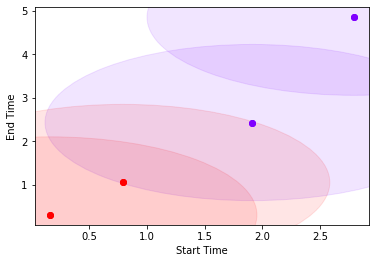

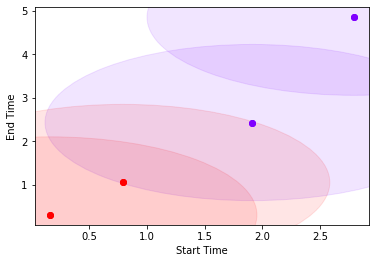

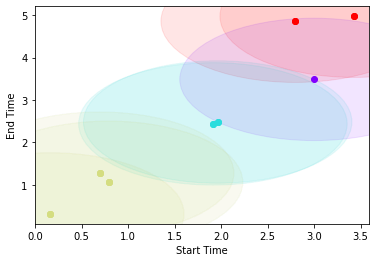

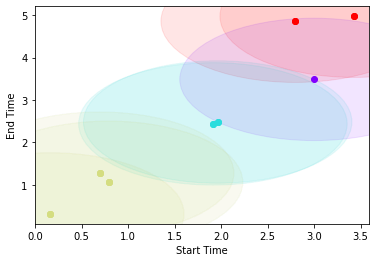

In [ ]:
label_clusters(DBSCAN_auto_dis_builder_min_dis2, "XC591821_-_Screaming_Piha_-_Lipaugus_vociferans.mp3", distance = 1/2, iterate_users=True)